In [1]:
pip install praw

     |████████████████████████████████| 153kB 2.9MB/s 
     |████████████████████████████████| 204kB 8.4MB/s 


In [2]:
import praw
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [3]:
reddit = praw.Reddit(client_id='QHdGeZaYJfEzVQ', client_secret='wB-rAU3ZPOTZylLxUQas-QBszyk', user_agent='somya')
subreddit = reddit.subreddit('india')

In [5]:
flair_dict={'Political','Non-political','Reddiquette','AskIndia','Science & Technology','Policy & Economy','Finance & Business','Sports and food','Photography','AMA'}

In [6]:
# Function to convert timestamp to datetime
def get_date(created):
    return dt.datetime.fromtimestamp(created)

In [30]:
topics_dict = { "title":[],"score":[],"id":[],"url":[],"comms_num": [],"created": [],"body":[],"flair":[]}
for flair in flair_dict:
    for submission in subreddit.search(flair,limit=1000):
        topics_dict["title"].append(submission.title)
        topics_dict["score"].append(submission.score)
        topics_dict["id"].append(submission.id)
        topics_dict["url"].append(submission.url)
        topics_dict["comms_num"].append(submission.num_comments)
        topics_dict["created"].append(submission.created)
        topics_dict["body"].append(submission.selftext)
        topics_dict["flair"].append(flair)

data = pd.DataFrame(topics_dict)
len(data['title'])

1963

In [31]:
data.tail(10)

,title,score,id,url,comms_num,created,body,flair
1953,Compare with India: Wall St Jrnl praises S Kor...,2,1joxi7,https://www.reddit.com/r/india/comments/1joxi7...,7,1.375671e+09,Read till the end:\n\nhttp://online.wsj.com/ar...,Science & Technology
1954,Make In India,1,35oidm,https://www.reddit.com/r/india/comments/35oidm...,4,1.431438e+09,Hello fellows! how can we know of goods and ma...,Science & Technology
1955,Why Indian Institutes are not able to rank wel...,0,51n3bb,https://www.reddit.com/r/india/comments/51n3bb...,0,1.473306e+09,According to the reputed QS World University R...,Science & Technology
1956,[NP] 70 years of Independence: India's journey...,1,4xtcdd,https://www.reddit.com/r/india/comments/4xtcdd...,1,1.471293e+09,Nearly 60% of Indians are below the age group ...,Science & Technology
1957,How many of you think that India has any hope ...,0,10qekr,https://www.reddit.com/r/india/comments/10qekr...,11,1.349077e+09,"Accept it or not, right now the country is a m...",Science & Technology
1958,r/India! What other subreddits do you visit,1,1pqkjo,https://www.reddit.com/r/india/comments/1pqkjo...,4,1.383401e+09,"Points for the more obscure ones, and for find...",Science & Technology
1959,UG courses/colleges relating to computers for ...,0,46qon4,https://www.reddit.com/r/india/comments/46qon4...,1,1.456014e+09,I'm 18 y.o. commerce with maths student. I am ...,Science & Technology
1960,"Please consider buying our book ""India 2020 --...",9,13ehd8,https://www.reddit.com/r/india/comments/13ehd8...,2,1.353284e+09,A friend and I have co-written this book:\nhtt...,Science & Technology
1961,An Exposition and Solution to the NGO problem,1,28fy7b,https://www.reddit.com/r/india/comments/28fy7b...,1,1.403106e+09,**Disclaimer**: I am not the author. This exce...,Science & Technology
1962,Mobile Harvest in India,0,23c8xq,https://www.reddit.com/r/india/comments/23c8xq...,0,1.397834e+09,"Erratic weather, manipulation by GM companies ...",Science & Technology


In [32]:
# Converting timestamp to datetime format
_timestamp = data["created"].apply(get_date)
data = data.assign(timestamp = _timestamp)
del data['created']

In [33]:
data['flair'].value_counts()

Political               247
Finance & Business      231
AskIndia                230
Photography             221
Policy & Economy        220
Non-political           216
AMA                     213
Science & Technology    202
Reddiquette             131
Sports and food          52
Name: flair, dtype: int64

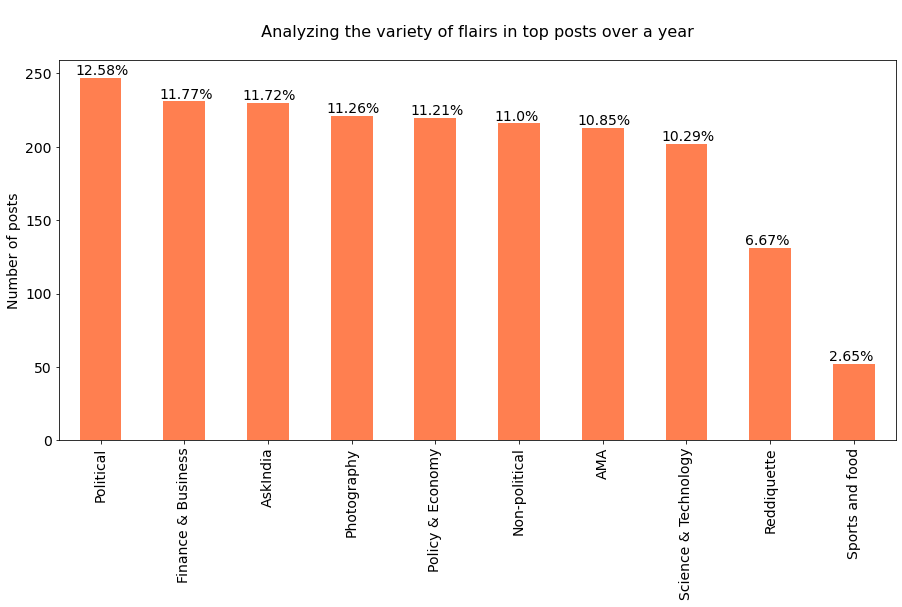

In [34]:
plot = data['flair'].value_counts().plot(kind='bar', figsize=(15,7), color="coral", fontsize=14);
plot.set_title("\n Analyzing the variety of flairs in top posts over a year \n", fontsize=16)
plot.set_ylabel("Number of posts", fontsize=14);

# Find the values and their sum
totals = []
for i in plot.patches:
    totals.append(i.get_height())
total = np.sum(totals)

# Set individual bar lables using above list
for i in plot.patches:
    # get_x pulls left or right; get_height pushes up or down
    plot.text(i.get_x()-0.05, i.get_height()+ 2, str(round((i.get_height()/total)*100, 2))+'%', fontsize=14)

In [37]:
new=pd.read_csv('/content/drive/My Drive/reddit_data.csv')
new

,Unnamed: 0,title,score,id,subreddit,url,num_comments,body,created,flair
0,0,"Attractive men, what type of attention do you ...",20,cprtaa,india,https://www.reddit.com/r/india/comments/cprtaa...,21,"xposted from /r/askmen, posted here because In...",1.565725e+09,AskIndia
1,1,[askindia] My brothers bank account was hacked...,42,dacmel,india,https://www.reddit.com/r/india/comments/dacmel...,64,My brother received bunch of SMS this morning ...,1.569682e+09,AskIndia
2,2,[AskIndia] What song is this ?,5,comakt,india,https://www.reddit.com/r/india/comments/comakt...,6,Often when I think of home there is a particul...,1.565493e+09,AskIndia
3,3,[AskIndia][Serious] Is it worth attempting imm...,55,c4ilk5,india,https://www.reddit.com/r/india/comments/c4ilk5...,115,Title. \n\nFrom what I understand based on arm...,1.561382e+09,AskIndia
4,4,[AskIndia] What are some cheap but reliable an...,21,dpmgmj,india,https://www.reddit.com/r/india/comments/dpmgmj...,25,I won't play games or edit videos.\n\nI will u...,1.572552e+09,AskIndia
...,...,...,...,...,...,...,...,...,...,...
2505,2505,MASAAN director Neeraj Ghaywan here. I'm here ...,207,3f10la,india,https://www.reddit.com/r/india/comments/3f10la...,198,Thank you for taking time out guys. I *really*...,1.438207e+09,AMA
2506,2506,"[AMAA] I just got scammed out of Rs 51,000 AMA!",186,2kvbea,india,https://www.reddit.com/r/india/comments/2kvbea...,338,"Like I said, I thought I was paying Rs 50k (ad...",1.414776e+09,AMA
2507,2507,r/IndiaInvestments is having an AMA with Gaura...,17,8hy5eh,india,https://www.reddit.com/r/india/comments/8hy5eh...,6,https://np.reddit.com/r/IndiaInvestments/comme...,1.525826e+09,AMA
2508,2508,"Hi r/India, I'm Nikhil Pahwa. AMA!",79,4vm9nk,india,https://www.reddit.com/r/india/comments/4vm9nk...,95,"Hi, I'm Nikhil Pahwa, /u/atnixxin, and I compl...",1.470084e+09,AMA


In [38]:
new['flair'].value_counts()

Politics              247
Food                  242
Scheduled             234
Business/Finance      233
AskIndia              232
Sports                231
Photography           222
Science/Technology    221
Policy/Economy        220
Non-Political         216
AMA                   212
Name: flair, dtype: int64

In [39]:
# Function to convert timestamp to datetime
def get_date(created):
    return dt.datetime.fromtimestamp(created)
# Converting timestamp to datetime format
_timestamp = new["created"].apply(get_date)
new = new.assign(timestamp = _timestamp)
del new['created']

In [40]:
new=new.rename(columns={'num_comments': 'comms_num'})

In [41]:
new.drop(['subreddit','Unnamed: 0'],axis=1, inplace=True)

In [42]:
dictionary={'Politics' : 'Political','Non-Political': 'Non-political','Science/Technology': 'Science & Technology','Policy/Economy' : 'Policy & Economy','Business/Finance': 'Finance & Business','Sports': 'Sports and food', 'Food': 'Sports and food'}

In [43]:
new['flair']=new['flair'].map(dictionary)

In [44]:
new['flair'].value_counts()

Sports and food         473
Political               247
Finance & Business      233
Science & Technology    221
Policy & Economy        220
Non-political           216
Name: flair, dtype: int64

In [45]:
df=pd.concat([data, new]).reset_index(drop=True)

In [46]:
df.drop_duplicates(subset ='id', 
                     keep = 'first', inplace = True)

In [47]:
df.reset_index(drop=True)

,title,score,id,url,comms_num,body,flair,timestamp
0,AP wins feature photography Pulitzer for Kashm...,50,gdjmlb,https://www.wfmj.com/story/42087148/ap-wins-fe...,0,,Photography,2020-05-05 04:37:44
1,[OC] Just messing around with my camera two da...,10,fubt1o,https://imgur.com/SO8wJSn,3,,Photography,2020-04-04 00:47:45
2,Looking for an analog/film photography camera,3,fjisys,https://www.reddit.com/r/india/comments/fjisys...,1,I am looking for a good film/analog camera for...,Photography,2020-03-16 18:24:42
3,Weekly photography thread thread - December 09...,17,e84big,https://www.reddit.com/r/india/comments/e84big...,11,This is a weekly scheduled thread for all the ...,Photography,2019-12-09 11:32:40
4,Anyone having a similar problem?,40,hbe1j4,https://www.reddit.com/r/india/comments/hbe1j4...,48,"Hi redditors, \nI am 29y (M) from a liberal mu...",Photography,2020-06-18 20:53:45
...,...,...,...,...,...,...,...,...
3022,AMA Announcement: Sanjeev Sabhlok from the Swa...,22,9mxnv9,https://www.reddit.com/r/india/comments/9mxnv9...,0,"Hi /r/india, \n\nMr. Sanjeev Sabhlok, a former...",NaN,2018-10-10 16:32:18
3023,"[NP] r/India, what's bothering you? I'm here t...",27,4rhdqd,https://www.reddit.com/r/india/comments/4rhdqd...,178,Let's hear it.,NaN,2016-07-06 15:35:35
3024,"Hi r/India, I am Kumaran Mahalingam, a Geologi...",111,5szty8,https://www.reddit.com/r/india/comments/5szty8...,40,I'm a Geologist passionate about Standup-Paddl...,NaN,2017-02-09 20:58:51
3025,r/IndiaInvestments is having an AMA with Gaura...,17,8hy5eh,https://www.reddit.com/r/india/comments/8hy5eh...,6,https://np.reddit.com/r/IndiaInvestments/comme...,NaN,2018-05-09 00:40:36


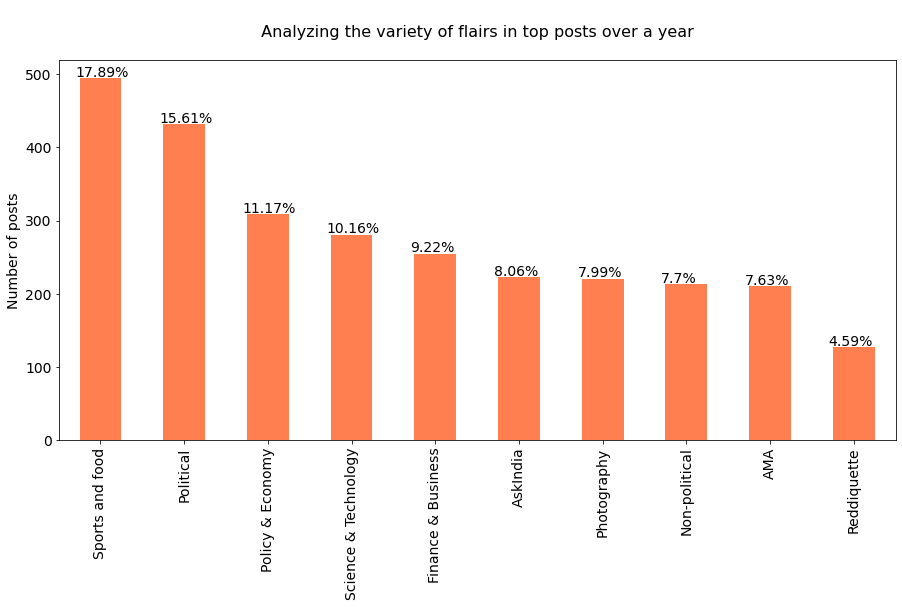

In [48]:
plot = df['flair'].value_counts().plot(kind='bar', figsize=(15,7), color="coral", fontsize=14);
plot.set_title("\n Analyzing the variety of flairs in top posts over a year \n", fontsize=16)
plot.set_ylabel("Number of posts", fontsize=14);

# Find the values and their sum
totals = []
for i in plot.patches:
    totals.append(i.get_height())
total = np.sum(totals)

# Set individual bar lables using above list
for i in plot.patches:
    # get_x pulls left or right; get_height pushes up or down
    plot.text(i.get_x()-0.05, i.get_height()+ 2, str(round((i.get_height()/total)*100, 2))+'%', fontsize=14)

In [49]:
df.describe()

,score,comms_num
count,3027.000000,3027.000000
mean,143.017509,65.378262
std,541.601630,442.937256
min,0.000000,0.000000
25%,9.000000,4.000000
50%,28.000000,13.000000
75%,104.000000,45.000000
max,18432.000000,10960.000000


In [50]:
df.to_csv('dataset.csv',index=False)